# Final Project Submission
 - Student name: Morgan Jones
 - Student pace: Full Time
 - Scheduled project review date/time:
 - Instructor name: Abhineet Kulkarni
 - Blog post URL: 

# Introduction 
***


## Business Case

As of May 4, 2020 COVID-19 has had devastating impacts on the world. To date, there are over 3.5 million confirmed cases in roughly a 5 month window of time. While there are several factors that have led to these disheartening statistics, one key element in this proliferation is travel. Due to the often asymptomatic nature of COVID-19 infections, infected individuals have been able to unknowingly spread the virus to over 200 countries and territories. 
In order to 'flatten the curve' my group would like to **propose a systematic approach to implementing non-invasive testing at key international airports that would identify and quarantine would be infected travelers**. Our proposal is simple, through effective risk mapping and assessment driven by data, high risk travelers' lungs are scanned with computed tomography (CT), and the resulting **x-ray images are assessed with a Convolutional Neural Network trained on detecting COVID-19**. Those travelers identified by the neural network as infected would then be further tested by medical professionals before being approved for travel. **This project focuses on the creation and optimization of this COVID-19 detecting CNN**.

## Objectives

There are two main objectives for this portion of the aforementioned proposal, which are as follows:
 1. Generate a Convolutional Neural Network (CNN) which detects the presence of COVID-19 in CT images with a **high** accuracy.
 2. Reveal indicators of COVID-19 through analysis of said CNN.

## Evaluation Metrics

Our task is essentially a binary classification problem, where an x-ray image is considered input, and **our model produces an prediction of whether this image is of a COVID-19 infected lung, or is not**. With these objectives and framework in mind, the threshold of success mainly rests on the accuracy of our model. We will set the goal of our model attaining **at least an 80% accuracy**. With accuracy here being defined as:

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

Then our model will be successful where:

$$Accuracy >= .80$$


In the case where our model predicts incorrectly, we **prefer a false positive more than a false negative**. In the case of a false positive, a traveler is determined as infected where they are not. In this case that person would be held for further testing, potentially missing their flight. However **in the case of a false negative, our model has determined that an image of lungs that are COVID-19 infected are not, and thus that traveler would continue on potentially infecting others**. Therefore we aim for a model where:


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$

  

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$

Our model will achieve:

$$ \text{Precision}  <  \text{Recall} $$


## Methodology

The process for conducting our research and modeling will follow the iterative **OSEMiN** pipeline. This entails Obtaining, Scrubbing, Exploring, Modeling, and Interpreting the data. This project will use this pipeline in the following manner: 

**OSEMiN Pipeline**:

    Obtain
    - Import the data.

    Scrub
    - Manage datatypes, resolve missing/duplicate values.
    
    Explore
    - Find patterns among the relationships of variables in the dataset.
    
    Model
    - Create predictive models.
    
    iNterpret
    – Identify insights and visualize findings.

Python using keras with a tensorflow backend

Definition for transfer learning: In their famous book, Deep Learning, Goodfellow et al refer to transfer learning in the context of generalization. Their definition is as follows:
Situation where what has been learned in one setting is exploited to improve generalization in another setting.

Inductive Transfer learning: In this scenario, the source and target domains are the same, yet the source and target tasks are different from each other. The algorithms try to utilize the inductive biases of the source domain to help improve the target task. Depending upon whether the source domain contains labeled data or not, this can be further divided into two subcategories, similar to multitask learning and self-taught learning, respectively.

Feature-representation transfer: This approach aims to minimize domain divergence and reduce error rates by identifying good feature representations that can be utilized from the source to target domains. Depending upon the availability of labeled data, supervised or unsupervised methods may be applied for feature-representation-based transfers.

# Obtain
***

At this stage, there is a limited amount of data pertaining to CT scans of COVID-19 cases available openly with respect to the amount effective when conducting deep learning. For this reason we will first build a model on pneumonia data, using x-ray images of lungs affected by pneumonia, and negatives of lungs not affected by pneumonia. After creating this model, we will conduct transfer learning to further train this CNN to assess for COVID-19 with our smaller dataset. In order to begin, we will need to obtain this data, and the libraries needed for this project.

## Import Libraries

We will start with the most popular libraries for importing and manipulating data. These first libraries are as follows:

In [1]:
import pandas as pd  # Alias pandas to be referred to as pd
import numpy as np  # Alias numpy to be referred to as np
import matplotlib.pyplot as plt  # Alias matplotlib.pyplot to be referred to as plt
import matplotlib.ticker as ticker # Alias matplotlib.ticker to be referred to as ticker
import seaborn as sns  # Alias seaborn to be referred to as sns
import os, shutil # Necessary for creating new folders to store image data

# Magic funtion to allow plot outputs to appear and be stored within out notebook
%matplotlib inline
# View all of the columns of a returned object
pd.set_option('display.max_columns', None)

## Import Pneumonia Data

We will source our pneumonia dataset from "Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning". This data can be found at the url: https://data.mendeley.com/datasets/rscbjbr9sj/3 with License: CC BY 4.0 and Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5. This data has also been featured on Kaggle from the user Paul Mooney at this url: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia . We will download these pneumonia images from kaggle now.

In [2]:
pne_train_dir = 'pneumonia_dataset/chest_xray/train/PNEUMONIA'
norm_train_dir = 'pneumonia_dataset/chest_xray/train/NORMAL'

pne_test_dir = 'pneumonia_dataset/chest_xray/test/PNEUMONIA'
norm_test_dir = 'pneumonia_dataset/chest_xray/test/NORMAL'

pne_val_dir = 'pneumonia_dataset/chest_xray/val/PNEUMONIA'
norm_val_dir = 'pneumonia_dataset/chest_xray/val/NORMAL'

In [3]:
imgs_pne_train = [file for file in os.listdir(pne_train_dir) if file.endswith('.jpeg')]

In [4]:
type(imgs_pne_train)

list

In [5]:
imgs_pne_train[0:5]

['person1000_bacteria_2931.jpeg',
 'person1000_virus_1681.jpeg',
 'person1001_bacteria_2932.jpeg',
 'person1002_bacteria_2933.jpeg',
 'person1003_bacteria_2934.jpeg']

In [6]:
print('There are', len(imgs_pne_train), 'Pneumonia training images')

There are 3778 Pneumonia training images


In [7]:
imgs_norm_train = [file for file in os.listdir(norm_train_dir) if file.endswith('.jpeg')]

In [8]:
print('There are', len(imgs_norm_train), 'Normal training images')

There are 1244 Normal training images


In [9]:
imgs_pne_test = [file for file in os.listdir(
    pne_test_dir) if file.endswith('.jpeg')]
imgs_norm_test = [file for file in os.listdir(
    norm_test_dir) if file.endswith('.jpeg')]

imgs_pne_val = [file for file in os.listdir(
    pne_val_dir) if file.endswith('.jpeg')]
imgs_norm_val = [file for file in os.listdir(
    norm_val_dir) if file.endswith('.jpeg')]

print('There are', len(imgs_pne_train), 'Pneumonia training images')
print('There are', len(imgs_norm_train), 'Normal training images')
print('\n')
print('There are', len(imgs_pne_test), 'Pneumonia testing images')
print('There are', len(imgs_norm_test), 'Normal testing images')
print('\n')
print('There are', len(imgs_pne_val), 'Pneumonia validation images')
print('There are', len(imgs_norm_val), 'Normal validation images')
print('\n')
print('There are', len(imgs_pne_train)+len(imgs_norm_train)+len(imgs_pne_test) +
      len(imgs_norm_test)+len(imgs_pne_val)+len(imgs_norm_val), 'images in total.')

There are 3778 Pneumonia training images
There are 1244 Normal training images


There are 390 Pneumonia testing images
There are 234 Normal testing images


There are 105 Pneumonia validation images
There are 105 Normal validation images


There are 5856 images in total.


Let's take a look at our first image in the pneumonia training set:

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2757963170200746794
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4937233203
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12837701651220138193
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [11]:
from keras.preprocessing.image import image, array_to_img, img_to_array, load_img, ImageDataGenerator
from keras import optimizers
np.random.seed(123)

Using TensorFlow backend.


(1, 224, 224, 3)


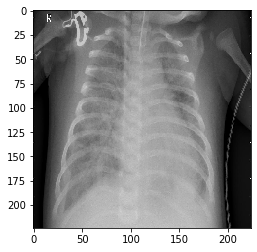

In [12]:
img_path = 'pneumonia_dataset/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

In [13]:
# get all the data in the directory test (624 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'pneumonia_dataset/chest_xray/test', 
        target_size=(224, 224), batch_size = 624) 

# get all the data in the directory validation (210 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'pneumonia_dataset/chest_xray/val', 
        target_size=(224, 224), batch_size = 210)

# get all the data in the directory split/train (5022 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'pneumonia_dataset/chest_xray/train', 
        target_size=(224, 224), batch_size=5022)

Found 624 images belonging to 2 classes.
Found 210 images belonging to 2 classes.
Found 5022 images belonging to 2 classes.


In [14]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [15]:
# plot images with labels
def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

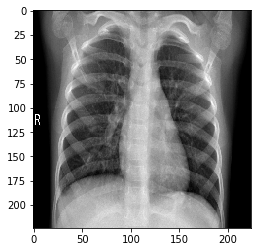

In [16]:
plt.imshow(train_images[0])

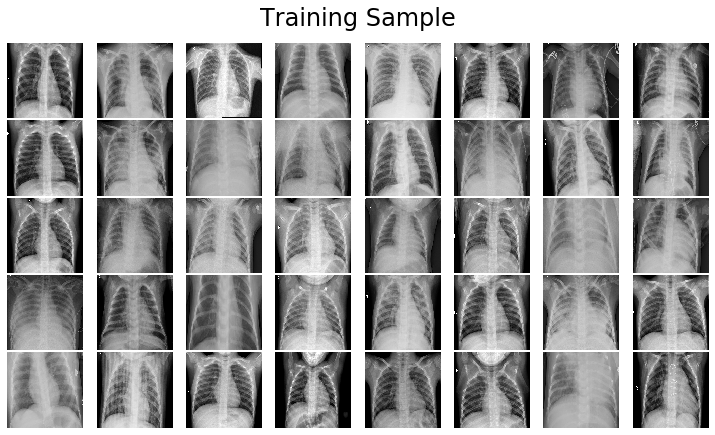

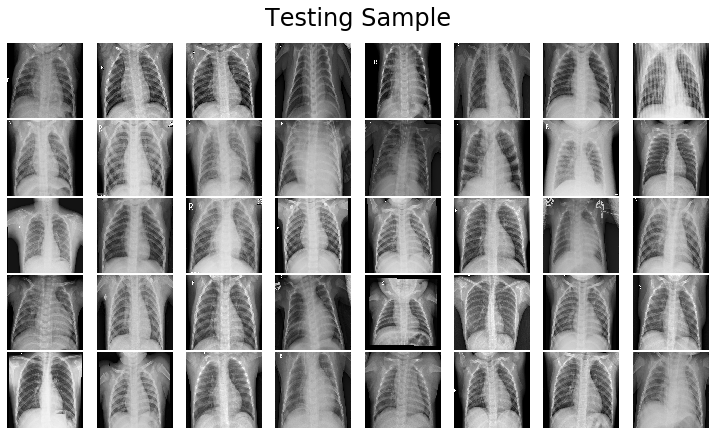

In [17]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

plot_images(train_images, 'Training Sample')
plot_images(test_images, 'Testing Sample')

In [18]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5022
Number of testing samples: 624
Number of validation samples: 210
train_images shape: (5022, 224, 224, 3)
train_labels shape: (5022, 2)
test_images shape: (624, 224, 224, 3)
test_labels shape: (624, 2)
val_images shape: (210, 224, 224, 3)
val_labels shape: (210, 2)


In [19]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5022, 150528)
(624, 150528)
(210, 150528)


In [20]:
train_y = np.reshape(train_labels[:,0], (5022,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (210,1))

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2D

Artificial Neural Network

In [22]:
# Build a baseline fully connected model
from keras import models
from keras import layers

np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(150528,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                3010580   
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 3,010,773
Trainable params: 3,010,773
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Train on 5022 samples, validate on 210 samples
Epoch 1/50
5022/5022 [==============================] - 5s 921us/step - loss: 0.5053 - accuracy: 0.7830 - val_loss: 0.6257 - val_accuracy: 0.7571
Epoch 2/50
5022/5022 [==============================] - 4s 784us/step - loss: 0.3560 - accuracy: 0.8521 - val_loss: 0.4801 - val_accuracy: 0.9000
Epoch 3/50
5022/5022 [==============================] - 4s 792us/step - loss: 0.2887 - accuracy: 0.8941 - val_loss: 0.5129 - val_accuracy: 0.8286
Epoch 4/50
5022/5022 [==============================] - 4s 788us/step - loss: 0.2620 - accuracy: 0.9114 - val_loss: 0.4861 - val_accuracy: 0.8476
Epoch 5/50
5022/5022 [==============================] - 4s 781us/step - loss: 0.2410 - accuracy: 0.9213 - val_loss: 0.4467 - val_accuracy: 0.8429
Epoch 6/50
5022/5022 [==============================] - 4s 790us/step - loss: 0.2240 - accuracy: 0.9249 - val_loss: 0.4961 - val_accuracy: 0.8095
Epoch 7/50
5022/5022 [==============================] - 4s 789us/step - loss:

In [25]:
results_train = model.evaluate(train_img, train_y) 

5022/5022 [==============================] - 3s 668us/step


In [26]:
results_test = model.evaluate(test_img, test_y)

624/624 [==============================] - 0s 702us/step


In [27]:
results_train

[0.08474654129590233, 0.9679410457611084]

In [28]:
results_test

[0.8510871804677523, 0.7804487347602844]

Baseline CNN:

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [31]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Train on 5022 samples, validate on 210 samples
Epoch 1/30
5022/5022 [==============================] - 15s 3ms/step - loss: 0.4982 - acc: 0.7712 - val_loss: 0.5468 - val_acc: 0.7190
Epoch 2/30
5022/5022 [==============================] - 13s 3ms/step - loss: 0.2915 - acc: 0.8825 - val_loss: 0.4054 - val_acc: 0.8238
Epoch 3/30
5022/5022 [==============================] - 12s 2ms/step - loss: 0.1967 - acc: 0.9241 - val_loss: 0.2343 - val_acc: 0.9190
Epoch 4/30
5022/5022 [==============================] - 13s 2ms/step - loss: 0.1569 - acc: 0.9415 - val_loss: 0.3357 - val_acc: 0.8571
Epoch 5/30
5022/5022 [==============================] - 13s 2ms/step - loss: 0.1328 - acc: 0.9478 - val_loss: 0.2047 - val_acc: 0.9190
Epoch 6/30
5022/5022 [==============================] - 13s 2ms/step - loss: 0.1231 - acc: 0.9532 - val_loss: 0.3517 - val_acc: 0.8571
Epoch 7/30
5022/5022 [==============================] - 13s 3ms/step - loss: 0.1158 - acc: 0.9554 - val_loss: 0.4719 - val_acc: 0.8286
Epoch 8/

In [32]:
results_train = model.evaluate(train_images, train_y)

5022/5022 [==============================] - 6s 1ms/step


In [33]:
results_test = model.evaluate(test_images, test_y)

624/624 [==============================] - 1s 1ms/step


In [34]:
results_train

[0.06575743779421375, 0.9741138815879822]

In [35]:
results_test

[1.572868017049936, 0.6907051205635071]

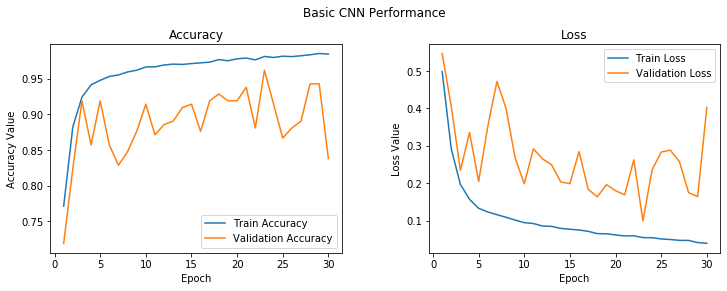

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

CNN with Regularization

In [37]:
input_shape = (224, 224, 3)

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [38]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Train on 5022 samples, validate on 210 samples
Epoch 1/30
5022/5022 [==============================] - 16s 3ms/step - loss: 0.5060 - accuracy: 0.8288 - val_loss: 2.2763 - val_accuracy: 0.5476
Epoch 2/30
5022/5022 [==============================] - 14s 3ms/step - loss: 0.2009 - accuracy: 0.9363 - val_loss: 0.8584 - val_accuracy: 0.7905
Epoch 3/30
5022/5022 [==============================] - 14s 3ms/step - loss: 0.1412 - accuracy: 0.9540 - val_loss: 0.0814 - val_accuracy: 0.9571
Epoch 4/30
5022/5022 [==============================] - 14s 3ms/step - loss: 0.1062 - accuracy: 0.9646 - val_loss: 0.0765 - val_accuracy: 0.9714
Epoch 5/30
5022/5022 [==============================] - 14s 3ms/step - loss: 0.1000 - accuracy: 0.9656 - val_loss: 0.2328 - val_accuracy: 0.9143
Epoch 6/30
5022/5022 [==============================] - 14s 3ms/step - loss: 0.0769 - accuracy: 0.9741 - val_loss: 0.1945 - val_accuracy: 0.9190
Epoch 7/30
5022/5022 [==============================] - 14s 3ms/step - loss: 0.0719

In [39]:
results_train = model.evaluate(train_images, train_y)

5022/5022 [==============================] - 6s 1ms/step


In [40]:
results_test = model.evaluate(test_images, test_y)

624/624 [==============================] - 1s 2ms/step


In [41]:
results_train

[0.0063508792865918425, 0.9980087876319885]

In [42]:
results_test

[2.5642977005396133, 0.7660256624221802]

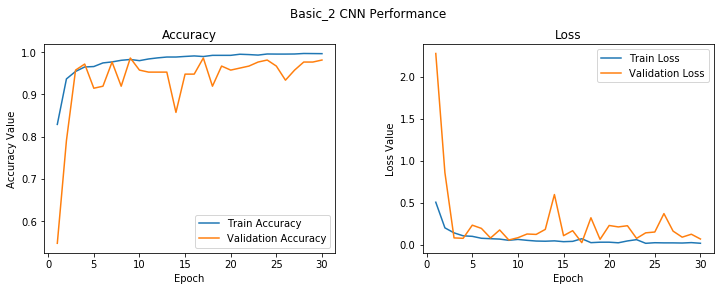

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic_2 CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
# model.save('basic_cnn.h5')

VGG16

In [47]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001EF18F351C8>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x000001EF18F35288>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000001EF18F359C8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000001EF18F44EC8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000001EF18F3F908>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000001EF5603FE48>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000001EF5640B808>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000001EF561D05C8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000001EF56037988>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000001EF56019088>,block3_conv3,False


(1, 7, 7, 512)


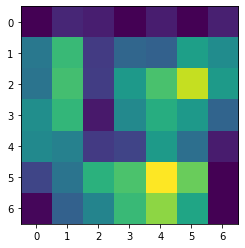

In [48]:
bottleneck_feature_example = vgg.predict(train_images[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [49]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_images)
validation_features_vgg = get_bottleneck_features(vgg_model, val_images)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (5022, 25088) 	Validation Bottleneck Features: (210, 25088)


In [50]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]
epochs = 30
batch_size = 32

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 513       
Total params: 13,108,737
Trainable params: 13,108,737
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(x=train_features_vgg, y=train_y,
                    validation_data=(validation_features_vgg, val_y),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 5022 samples, validate on 210 samples
Epoch 1/30
5022/5022 [==============================] - 3s 624us/step - loss: 0.1915 - accuracy: 0.9194 - val_loss: 0.5601 - val_accuracy: 0.8048
Epoch 2/30
5022/5022 [==============================] - 3s 577us/step - loss: 0.0895 - accuracy: 0.9654 - val_loss: 0.8960 - val_accuracy: 0.7762
Epoch 3/30
5022/5022 [==============================] - 3s 568us/step - loss: 0.0707 - accuracy: 0.9697 - val_loss: 0.1037 - val_accuracy: 0.9667
Epoch 4/30
5022/5022 [==============================] - 3s 567us/step - loss: 0.0608 - accuracy: 0.9785 - val_loss: 0.2052 - val_accuracy: 0.9143
Epoch 5/30
5022/5022 [==============================] - 3s 568us/step - loss: 0.0555 - accuracy: 0.9799 - val_loss: 0.3659 - val_accuracy: 0.8952
Epoch 6/30
5022/5022 [==============================] - 3s 572us/step - loss: 0.0451 - accuracy: 0.9837 - val_loss: 0.3115 - val_accuracy: 0.9095
Epoch 7/30
5022/5022 [==============================] - 3s 570us/step - loss:

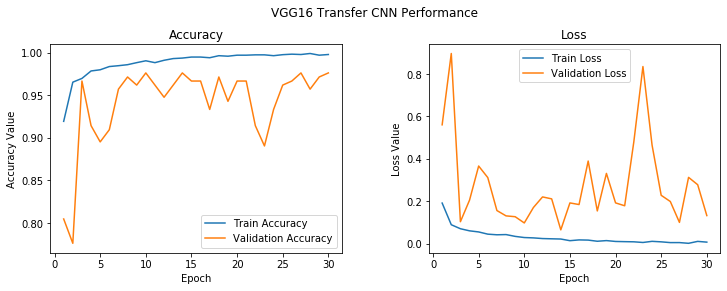

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16 Transfer CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [62]:
test_bottleneck_features = get_bottleneck_features(model, test_imgs_scaled)

predictions = model.predict_classes(test_bottleneck_features, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

NameError: name 'test_imgs_scaled' is not defined

In [53]:
results_train = model.evaluate(train_features_vgg, train_y)

5022/5022 [==============================] - 1s 193us/step


In [61]:
x_test /= 255.

# getting model predictions
test_predictions = model.predict(x_test)
predictions = pd.DataFrame(test_predictions, columns=labels_ohe_names.columns)
predictions = list(predictions.idxmax(axis=1))
test_labels = list(y_test)

# evaluate model performance
import model_evaluation_utils as meu
meu.get_metrics(true_labels=test_labels, 
                predicted_labels=predictions)

NameError: name 'x_test' is not defined

In [54]:
results_test = model.evaluate(test_images, test_y)

ValueError: Error when checking input: expected input_2 to have 2 dimensions, but got array with shape (624, 224, 224, 3)

In [55]:
results_train

[0.0001818567815189881, 1.0]

In [60]:
print("Loss of the model is - " , model.evaluate(train_features_vgg, train_y)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(train_features_vgg, train_y)[1]*100 , "%")
print('\n')
print("Accuracy of the model is - " , model.evaluate(train_features_vgg, test_y)[1]*100 , "%")

5022/5022 [==============================] - 1s 181us/step
Loss of the model is -  0.01818567815189881 %
5022/5022 [==============================] - 1s 178us/step
Accuracy of the model is -  100.0 %


In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

In [ ]:
results_test

In [ ]:
model.save('vgg_16_1.h5')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_images, train_y, batch_size=30)
val_generator = val_datagen.flow(val_images, val_y, batch_size=20)

In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)    

VGG19

by the Visual Geometry Group at the University of Oxford, which specializes in building very deep convolutional networks for large-scale visual recognition.

variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). There are other variants of VGG like VGG11, VGG16 and others. VGG19 has 19.6 billion FLOPs

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
vgg19 = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(224, 224, 3))

In [ ]:
# Define Model Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

cnn_base.trainable = False

In [ ]:
# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model.trainable_weights))

model.summary()

In [ ]:
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

"""
# get all the data in the directory test (624 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'chest_xray/chest_xray/test', 
        target_size=(224, 224), batch_size = 624) 

# get all the data in the directory validation (210 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'chest_xray/chest_xray/val', 
        target_size=(224, 224), batch_size = 210)

# get all the data in the directory split/train (5022 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'chest_xray/chest_xray/train', 
        target_size=(224, 224), batch_size=5022)
"""

# Get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

"""

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(240, 240), 
                                                    batch_size= 20,
                                                    class_mode='categorical') 

# Get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir, 
                                                                       target_size=(240, 240), 
                                                                       batch_size=20,
                                                                       class_mode='categorical')

# Get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, 
                                                                        target_size=(240, 240), 
                                                                        batch_size=180,
                                                                        class_mode='categorical',
                                                                        shuffle=False)
"""

# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# Fitting the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=8,
                              epochs=30,
                              validation_data=val_generator,
                              validation_steps=10)


end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

In [ ]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

In [ ]:
vgg19_model = VGG19()

In [ ]:
vgg19_model.summary()

In [ ]:
vgg19_model.layers.pop()

In [ ]:
# Transform VGG19 into a sequential model
model = Sequential()
for layer in vgg19_model.layers:
    model.add(layer)

I believe that this is an issue with how Model was rewritten to be more graph-based. In addition to the layers property models also have an outputs property, so when you pop layers off your last layer is left dangling in the model's output (which is why your model still thinks its output size is 1000).

A method to pop layers off and manage all the links correctly is needed, but until then I believe this would work: (my model compiles, but I haven't tried training it yet)

In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Dense(1, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.fit_generator(train_images,
                    steps_per_epoch=4,
                    validation_data=(val_images, val_y),
                    validation_steps=4,
                    epochs=30,
                    verbose=2
                    )
"""
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))
"""

## Data Description

# Scrub
***

# Explore
***

Tracking covid with Weather API: https://developer.ibm.com/tutorials/chart-covid-19-progression-with-the-weather-company-disease-tracker-api/

# Model
***

**Pneumonia model**: https://www.kaggle.com/kosovanolexandr/keras-nn-x-ray-predict-pneumonia-86-54/data

**Keras documentation on pre-trained NN's**: https://keras.io/applications/

Covid Dataset (58): https://github.com/ieee8023/covid-chestxray-dataset

**Covid model with augmentation and transfer learning**: - https://github.com/casperbh96/COVID-19-Detection/blob/master/Deep_Learning_for_COVID_19.ipynb

**View model with google experiments**:  - https://experiments.withgoogle.com/visualizing-high-dimensional-space
                                     - http://projector.tensorflow.org/

**View model through Tensorboard**: - https://www.tensorflow.org/tensorboard/graphs
                                - https://adventuresinmachinelearning.com/introduction-to-tensorboard-and-tensorflow-visualization/
                                - https://www.datacamp.com/community/tutorials/tensorboard-tutorial

**Visualizing through activation layers**: Notes Module 4 Appendix

**Visualizing with Lucid**:  - https://github.com/MoJoMoon/lucid
                         - https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb

**Visualizing with Activation Atlas**: https://github.com/tensorflow/lucid/blob/master/notebooks/activation-atlas/class-activation-atlas.ipynb

# iNterpret
***

# Conclusion
***

In [ ]:
"""
train_folder = os.path.join(new_dir, 'train')
train_pne = os.path.join(train_folder, 'PNEUMONIA')
train_normal = os.path.join(train_folder, 'NORMAL')

test_folder = os.path.join(new_dir, 'test')
test_pne = os.path.join(test_folder, 'PNEUMONIA')
test_normal = os.path.join(test_folder, 'NORMAL')

val_folder = os.path.join(new_dir, 'validation')
val_pne = os.path.join(val_folder, 'PNEUMONIA')
val_normal = os.path.join(val_folder, 'NORMAL')

train_pne
"""

In [ ]:
"""
covid_images = []
covid_labels = []

for index, row in covid_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = covid_image_path + filename

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    covid_images.append(image)
    covid_labels.append(label)

normal_images = []
normal_labels = []

for index, row in normal_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = normal_image_path + filename

    # temporary fix while we preprocess ALL the images
    if filename == '4c268764-b5e5-4417-85a3-da52916984d8.jpg':
        break

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    normal_images.append(image)
    normal_labels.append(label)

# normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255

# normalize to interval of [0,1]
normal_images = np.array(normal_images) / 255
"""

In [ ]:
"""
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

plot_images(covid_images, 'Positive COVID-19 Cases')
plot_images(normal_images, 'Negative COVID-19 Cases')
"""